# Scrape the ETF chart data ([e.g.](https://www.justetf.com/en/etf-profile.html?isin=IE00B4L5Y983))

In [1]:
import pandas as pd
import seaborn as sns

import justetf_scraping

C:\Users\Alberto Gerri\AppData\Local\Temp\ipykernel_13080\2316241356.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
pd.set_option("display.max_columns", None)

## Load the data

Load overviews for all MSCI Worls and World Emerging Markets ETFs

In [3]:
msci_world_df = justetf_scraping.load_overview(
    strategy="epg-longOnly", index="MSCI World"
)
msci_em_df = justetf_scraping.load_overview(
    strategy="epg-longOnly", index="MSCI Emerging Markets"
)

C:\Users\Alberto Gerri\Documents\00_ex_Onedrive_Poli\coding\justetf-scraping-1\justetf_scraping\overview.py:426: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[column] = df[column].replace({"Yes": True, "No": False}).astype("bool")
C:\Users\Alberto Gerri\Documents\00_ex_Onedrive_Poli\coding\justetf-scraping-1\justetf_scraping\overview.py:426: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[column] = df[column].replace({"Yes": True, "No": False}).astype("bool")
C:\Users\Alberto Gerri\Documents\00_ex_Onedrive_Poli\coding\justetf-

Slice some longest running ETFs

In [4]:
df = pd.concat(
    [
        msci_world_df[msci_world_df["age_in_years"] > 15],
        msci_em_df[msci_em_df["age_in_years"] > 15],
    ]
)

In [5]:
df

,wkn,ticker,valor,name,index,inception_date,age_in_days,age_in_years,strategy,domicile_country,currency,hedged,securities_lending,dividends,ter,replication,size,is_sustainable,number_of_holdings,yesterday,last_week,last_month,last_three_months,last_six_months,last_year,last_three_years,last_five_years,2023,2022,2021,2020,last_dividends,last_year_dividends,last_year_volatility,last_three_years_volatility,last_five_years_volatility,last_year_return_per_risk,last_three_years_return_per_risk,last_five_years_return_per_risk,max_drawdown,last_year_max_drawdown,last_three_years_max_drawdown,last_five_years_max_drawdown
isin,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
FR0010315770,LYX0AG,LYYA,2538768,Amundi MSCI World II UCITS ETF Dist,MSCI World,2006-04-26,6513,17.843836,Long-only,France,EUR,False,False,Distributing,0.30,Swap based Unfunded,5761,False,<NA>,7.66,1.14,4.80,12.15,14.66,21.46,41.26,82.51,19.73,-12.70,31.16,6.42,1.26,1.51,10.43,13.92,17.91,2.06,0.88,0.71,-53.26,-7.51,-16.82,-33.75
IE00B0M62Q58,A0HGV0,IQQW,2308773,iShares MSCI World UCITS ETF (Dist),MSCI World,2005-10-28,6693,18.336986,Long-only,Ireland,USD,False,True,Distributing,0.50,Optimized sampling,6280,False,1481,7.69,1.15,5.20,11.83,14.08,21.35,39.84,79.62,19.24,-13.24,31.63,5.88,1.23,1.48,11.23,15.17,18.14,1.90,0.78,0.68,-52.75,-6.67,-17.02,-33.83
LU0340285161,A0NCFR,UIM7,3726774,UBS ETF (LU) MSCI World UCITS ETF (USD) A-dis,MSCI World,2008-06-25,5722,15.676712,Long-only,Luxembourg,USD,False,True,Distributing,0.30,Full replication,1103,False,1429,7.61,1.08,5.13,11.79,14.05,21.32,39.90,79.81,19.28,-13.24,31.75,5.86,1.22,1.46,11.20,15.22,18.22,1.90,0.78,0.68,-39.19,-6.66,-17.03,-33.89
LU0274208692,DBX1MW,DBXW,2825395,Xtrackers MSCI World Swap UCITS ETF 1C,MSCI World,2006-12-19,6276,17.194521,Long-only,Luxembourg,USD,False,False,Accumulating,0.45,Swap based Unfunded,3703,False,<NA>,7.60,1.03,5.11,11.93,14.05,21.41,40.36,81.41,19.44,-13.13,31.91,6.14,NaN,NaN,11.18,15.16,18.18,1.91,0.79,0.70,-53.40,-6.65,-17.00,-33.85
FR0010429068,LYX0BX,LYM7,2914117,Amundi MSCI Emerging Markets III UCITS ETF EUR...,MSCI Emerging Markets,2007-04-17,6157,16.868493,Long-only,France,EUR,False,False,Accumulating,0.55,Swap based Unfunded,812,False,<NA>,2.57,0.78,6.15,5.19,6.74,4.14,-12.02,11.69,5.62,-15.18,4.31,7.77,NaN,NaN,12.42,15.20,16.69,0.33,-0.28,0.13,-60.13,-8.88,-24.53,-31.76
FR0010435297,LYX0CV,LNY4,2914124,Amundi MSCI Emerging Markets III UCITS ETF USD...,MSCI Emerging Markets,2007-04-23,6151,16.852055,Long-only,France,USD,False,False,Accumulating,0.55,Swap based Unfunded,96,False,<NA>,2.40,0.52,6.46,4.81,6.16,4.06,-12.31,11.39,5.52,-15.44,5.07,6.18,NaN,NaN,11.91,14.54,16.58,0.34,-0.29,0.13,-60.42,-9.05,-24.32,-31.93
IE00B0M63177,A0HGWC,IQQE,2308849,iShares MSCI EM UCITS ETF (Dist),MSCI Emerging Markets,2005-11-18,6672,18.279452,Long-only,Ireland,USD,False,True,Distributing,0.18,Optimized sampling,3762,False,1277,2.72,0.82,6.66,5.23,6.55,4.75,-11.22,13.48,5.84,-13.82,3.82,8.05,2.27,2.32,12.01,14.77,16.89,0.40,-0.26,0.15,-59.08,-9.04,-24.09,-31.95
LU0292107645,DBX1EM,XMEM,3067289,Xtrackers MSCI Emerging Markets Swap UCITS ETF 1C,MSCI Emerging Markets,2007-06-22,6091,16.687671,Long-only,Luxembourg,USD,False,False,Accumulating,0.49,Swap based Unfunded,601,False,<NA>,2.51,0.56,6.43,4.95,6.28,4.36,-11.98,12.20,5.67,-15.37,5.11,7.49,NaN,NaN,11.89,14.67,16.87,0.37,-0.28,0.14,-60.16,-9.01,-24.26,-31.91


Load charts for the chosen ETFs

In [6]:
charts = {isin: justetf_scraping.load_chart(isin) for isin in df.index}

In [7]:
charts[list(charts)[0]]

,quote,relative,dividends,cumulative_dividends,quote_with_dividends,relative_with_dividends,reinvested_dividends,quote_with_reinvested_dividends,relative_with_reinvested_dividends
date,,,,,,,,,
2006-04-25,109.81,0.000000,0.0,0.00,109.81,0.000000,0.000000,109.810000,0.000000
2006-04-26,110.22,0.373372,0.0,0.00,110.22,0.373372,0.000000,110.220000,0.373372
2006-04-27,110.72,0.828704,0.0,0.00,110.72,0.828704,0.000000,110.720000,0.828704
2006-04-28,109.69,-0.109280,0.0,0.00,109.69,-0.109280,0.000000,109.690000,-0.109280
2006-04-29,109.69,-0.109280,0.0,0.00,109.69,-0.109280,0.000000,109.690000,-0.109280
...,...,...,...,...,...,...,...,...,...
2024-02-19,303.07,175.994900,0.0,50.76,353.83,222.220199,103.071886,406.141886,269.858743
2024-02-20,300.36,173.527001,0.0,50.76,351.12,219.752299,102.150235,402.510235,266.551530
2024-02-21,300.69,173.827520,0.0,50.76,351.45,220.052819,102.262465,402.952465,266.954253


## Visualize the Data

<Axes: xlabel='date'>

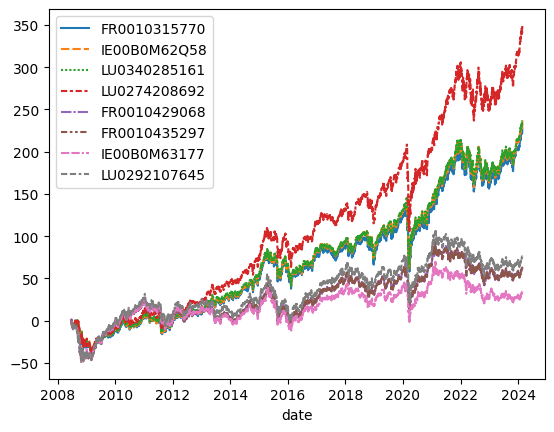

In [8]:
comparison_df = justetf_scraping.compare_charts(charts, input_value="quote")
sns.lineplot(comparison_df)

<Axes: xlabel='date'>

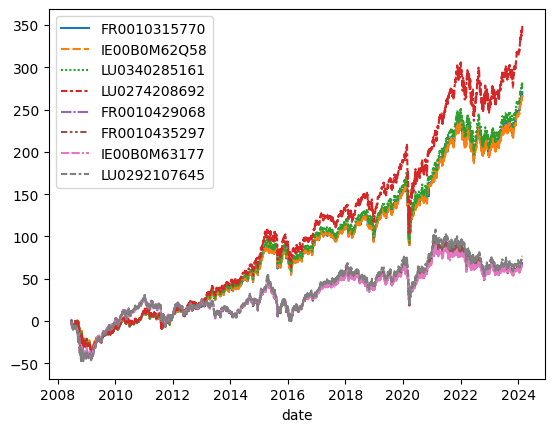

In [9]:
comparison_df = justetf_scraping.compare_charts(
    charts, input_value="quote_with_dividends"
)
sns.lineplot(comparison_df)

<Axes: xlabel='date'>

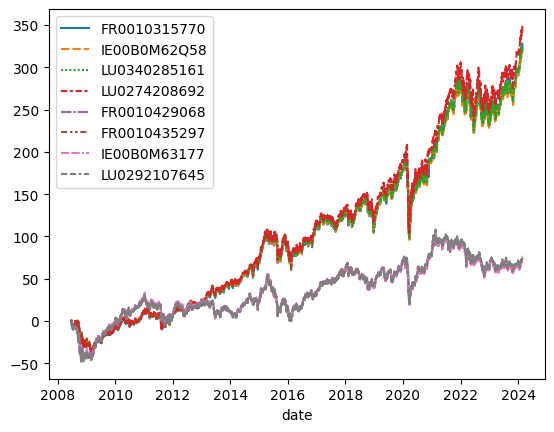

In [10]:
comparison_df = justetf_scraping.compare_charts(
    charts, input_value="quote_with_reinvested_dividends"
)
sns.lineplot(comparison_df)

<Axes: xlabel='date'>

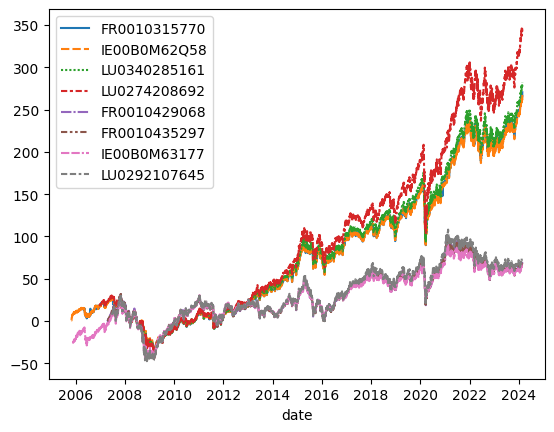

In [11]:
comparison_df = justetf_scraping.compare_charts(charts, dates="longest")
sns.lineplot(comparison_df)